<center><h1> <font color="green"><u>Active-Case Predictions ~ 19-nCoV</u></font> </h1></center>

<center><h3> <font color="#cc0000"><u>Active Cases(%) out of Confirmed</u></font> </h3></center>

<h3> <font color="purple"><u>This section includes:</u></font> </h3>

> * Data Filtering <br />
> * Training & Testing datasets <br />
> * Prediction <br />
> * Visualization (Scatter Plots) <br />

<br />

## Creating Datasets

In [1]:
# setting the working directory
setwd("~/Documents/A-tracking-of-2019-nCoV/COVID-19/ready_to_use")

In [2]:
# Loading desired libraries
library(ggplot2)
library(stringr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



<hr />

In [3]:
# includes data of all the countries
all = read.csv('COVID-19/Mixed/countryWise_bulk_summary.csv')

# includes data of four majour location
four = read.csv('COVID-19/FOUR/Four_dataset_locationWise.csv')

In [4]:

# extracting the desired dataset
extractDatases <- function(region){
    if(region %in% c("Hubei", "World", "Diamond Princess")) {
    temp = four[which(str_detect(four$Location, region)),]
    row.names(temp) <- NULL
} else {
    temp = all[which(str_detect(all$Country, region)),]
    row.names(temp) <- NULL
}

return(temp)
}


In [5]:
# country list
countries = matrix(levels(as.factor(all$Country)))
#head(countries, 10)

# Four majour locations
locations = matrix(levels(as.factor(four$Location)))
#locations

<br /> 
### Choosing desired Country/Region

In [6]:
# country i.e. to be used throughout the analysis
 rName = "China" # without hubei

# some other possible values of rName:
# 'World', 'Hubei', 'Diamond Cruise', 'Italy', 'Japan'.....etc

<hr />

In [7]:
# filtering out desired country/location 
region1 = extractDatases(rName)

# joining Hubei for complete data of china
region2 = extractDatases("Hubei")

region = cbind(region1[,1:3], region1[,4:8]+region2[,4:8])
colnames(region) <- colnames(region1)

tail(region)

,Country,Day,Date,Confirmed,Deaths,Recovered,Active.Cases,Closed.Cases
55,China,55,16-03-2020,81033,3217,67910,9906,71127
56,China,56,17-03-2020,81058,3230,68798,9030,72028
57,China,57,18-03-2020,81103,3241,69755,8107,72996
58,China,58,19-03-2020,81157,3249,70535,7373,73784
59,China,59,20-03-2020,81251,3253,71266,6732,74519
60,China,60,21-03-2020,81306,3259,71857,6190,75116


<hr />

In [8]:
region=region[,c(2, 4:8)]
head(region, 10)

Day,Confirmed,Deaths,Recovered,Active.Cases,Closed.Cases
1,548,17,28,503,45
2,643,18,30,595,48
3,920,26,36,858,62
4,1406,42,39,1325,81
5,2075,56,49,1970,105
6,2877,82,58,2737,140
7,5509,131,101,5277,232
8,6087,133,120,5834,253
9,8141,171,135,7835,306
10,9802,213,214,9375,427


In [9]:
# calculate the percent (using Confirmed cases as total)
percent <- function(dfName){
    get(dfName) -> df
    part <- NULL
    
    for(i in 1:nrow(df)) {
        val = df[i,"Active.Cases"]
        Total = df[i,"Confirmed"]
        
        
        if(i == 1)
            if(val==0)
                part = 0
            else
                part = as.numeric((val*100)/Total)
        else
            if(val==0)
                part = c(part, 0)
            else
                part <- c(part, as.numeric((val*100)/Total))
    }
        
    return(part)
}

<hr />

In [10]:
# CASES -> percentage
region$'percent_active' = percent("region")     # Active cases, out of every 100 Confirmed cases
region$'percent_closed' = 100-percent("region") # Closed cases, out of every 100 Confirmed cases

In [11]:
tail(region)

,Day,Confirmed,Deaths,Recovered,Active.Cases,Closed.Cases,percent_active,percent_closed
55,55,81033,3217,67910,9906,71127,12.224649,87.77535
56,56,81058,3230,68798,9030,72028,11.140171,88.85983
57,57,81103,3241,69755,8107,72996,9.995931,90.00407
58,58,81157,3249,70535,7373,73784,9.084860,90.91514
59,59,81251,3253,71266,6732,74519,8.285436,91.71456
60,60,81306,3259,71857,6190,75116,7.613214,92.38679


In [12]:
#write.csv(region, file = "COVID-19/regionToPredictActive.csv")

<br />* Dataset is ready

<hr /><br />

### Understanding the plot

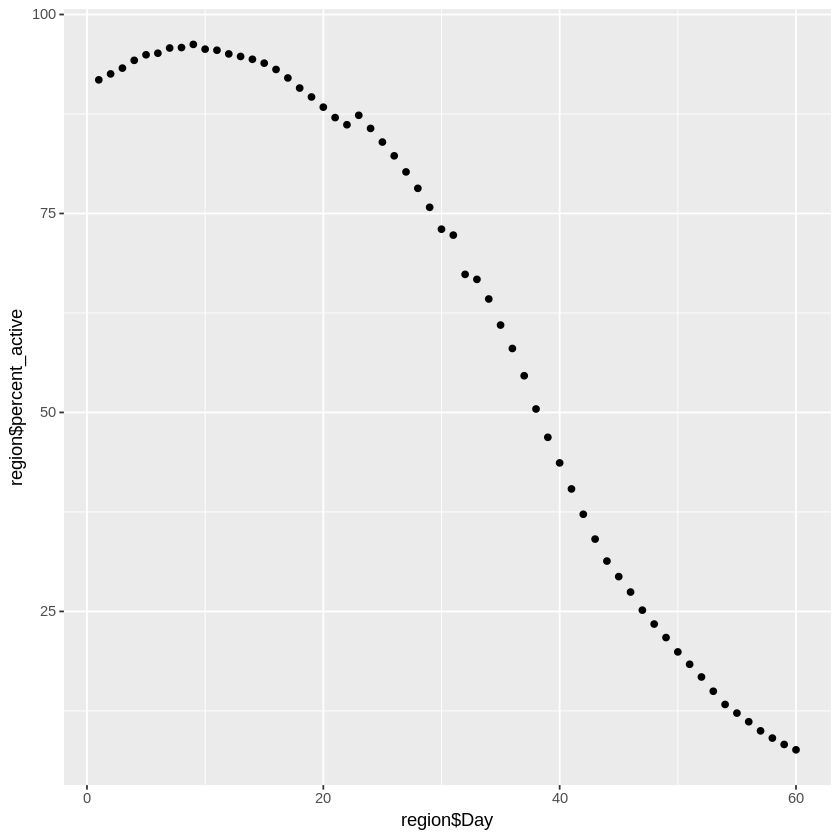

In [13]:
# Day vs %Closed Cases
region.scatter.plot <- ggplot(region, aes(x = region$Day, y = region$percent_active)) +
                        geom_point()
region.scatter.plot

In [14]:
tail(region)

,Day,Confirmed,Deaths,Recovered,Active.Cases,Closed.Cases,percent_active,percent_closed
55,55,81033,3217,67910,9906,71127,12.224649,87.77535
56,56,81058,3230,68798,9030,72028,11.140171,88.85983
57,57,81103,3241,69755,8107,72996,9.995931,90.00407
58,58,81157,3249,70535,7373,73784,9.084860,90.91514
59,59,81251,3253,71266,6732,74519,8.285436,91.71456
60,60,81306,3259,71857,6190,75116,7.613214,92.38679


<br /><hr /><br />

## Data-Analysis <br />

In [15]:
# loading plotting/machine learning
library(tidyverse)
library(caret)
library(mlbench)
library(kernlab)
library(rpart)

# setting the theme
theme_set(theme_classic())

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ tibble  2.1.1     ✔ purrr   0.3.3
✔ tidyr   1.0.2     ✔ dplyr   0.8.3
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift



Attaching package: ‘kernlab’


The following object is masked from ‘package:purrr’:

    cross


The following object is masked from ‘package:ggplot2’:

    alpha




In [16]:
set.seed(20) # generages same set of random sample every time

training.samples <- region$Day %>%
  createDataPartition(p = 0.8, list = FALSE)

train.data  <- region[training.samples, ]
test.data <- region[-training.samples, ]

In [17]:
tail(train.data, 3)
head(test.data, 3)

,Day,Confirmed,Deaths,Recovered,Active.Cases,Closed.Cases,percent_active,percent_closed
58,58,81157,3249,70535,7373,73784,9.084860,90.91514
59,59,81251,3253,71266,6732,74519,8.285436,91.71456
60,60,81306,3259,71857,6190,75116,7.613214,92.38679


,Day,Confirmed,Deaths,Recovered,Active.Cases,Closed.Cases,percent_active,percent_closed
4,4,1406,42,39,1325,81,94.23898,5.761024
13,13,19716,425,615,18676,1040,94.72510,5.274904
15,15,27440,563,1115,25762,1678,93.88484,6.115160


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



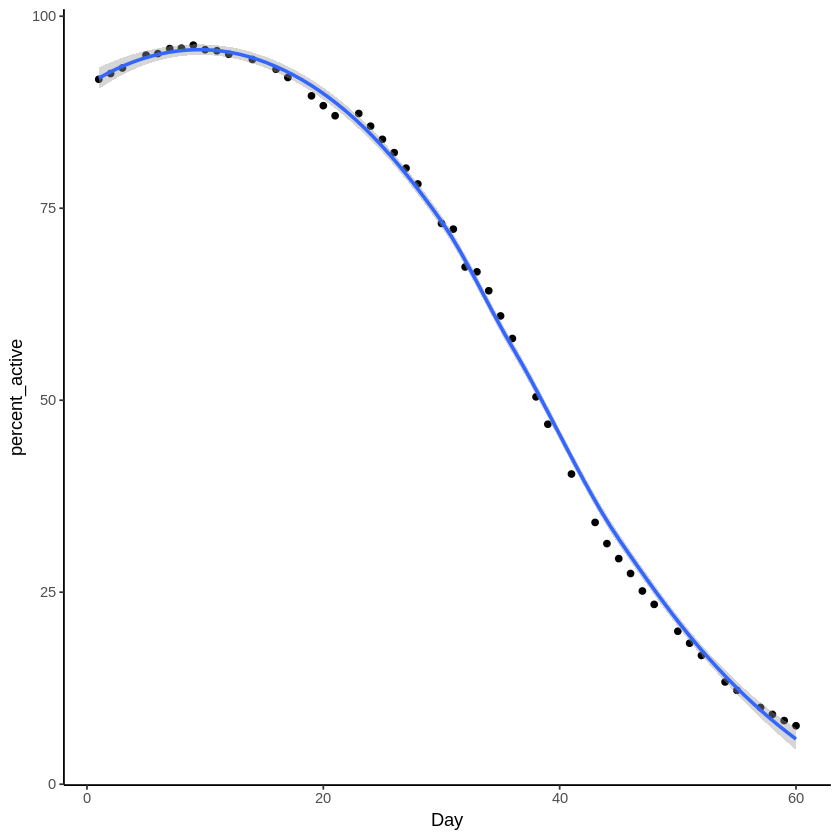

In [18]:
ggplot(train.data, aes(Day, percent_active) ) +
  geom_point() +
  stat_smooth()

<br /><hr /><br />

## Regrassion

### 1. Linear regression

In [19]:
# building linear model
fit.lm = lm(Day ~ percent_active, data = train.data)
#summary(fit.lm)

In [20]:
#Residual Standard error (Like Standard Deviation)
k=length(fit.lm$coefficients)-1
#Multiple R-Squared (Coefficient of Determination)
SSyy=sum((train.data$percent_active-mean(train.data$percent_active))**2)
    
SSE=sum(fit.lm$residuals**2)
n=length(fit.lm$residuals)
    
# final
rmse = sqrt(SSE/(n-1))
rse = sqrt(SSE/(n-(1+k))) #Residual Standard Error
r2 = (SSyy-SSE)/SSyy


# Model performance
data.frame(
       RMSE = rmse,
       RSE = rse,
       R2 = r2
     )

RMSE,RSE,R2
4.942561,4.995996,0.9767335


<br />

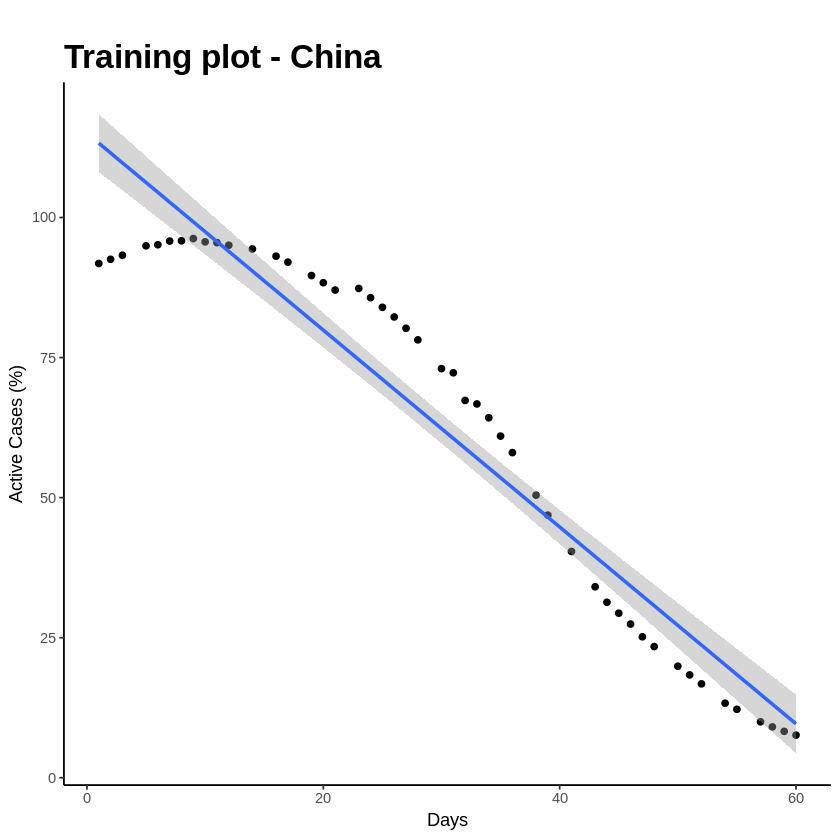

In [21]:
trainer <- ggplot(train.data, aes(Day, percent_active) ) +
              geom_point() +
              stat_smooth(method = lm, formula = y ~ x) +   # linear function
  
              # decoration
              labs( x = "Days", y = "Active Cases (%)", title = paste("\nTraining plot", rName, sep = " - ") ) +
              theme( plot.title = element_text(size = 20, face = "bold")) 
trainer

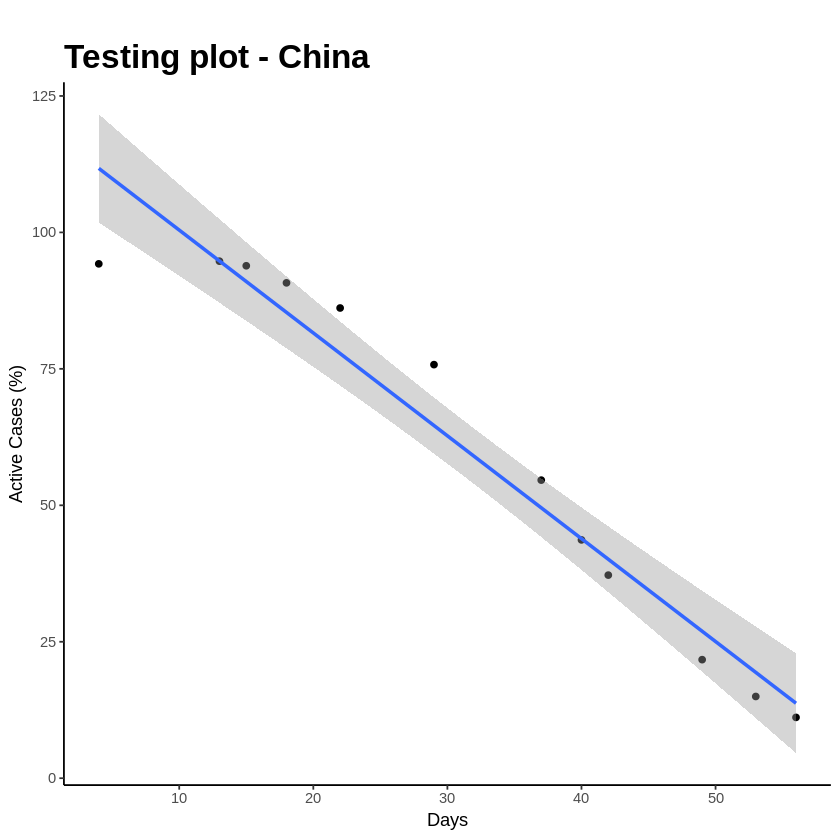

In [22]:
tester <- ggplot(test.data, aes(Day, percent_active) ) +
              geom_point() +
              stat_smooth(method = lm, formula = y ~ x) +   # linear function
  
              # decoration
              labs( x = "Days", y = "Active Cases (%)", title = paste("\nTesting plot", rName, sep = " - ") ) +
              theme( plot.title = element_text(size = 20, face = "bold")) 
tester

<br />

In [23]:
trained = cbind( # Prediction for training data
            train.data[,c("Day", "percent_active")],
            Pridicted_percent_active = predict(fit.lm, train.data)
          )

tested = cbind(  # Prediction for tested data
            test.data[,c("Day", "percent_active")],
            Pridicted_percent_active = predict(fit.lm, test.data)
         )


tail(trained, 5)
tail(tested, 5)

,Day,percent_active,Pridicted_percent_active
55,55,12.224649,56.32203
57,57,9.995931,57.49208
58,58,9.084860,57.97038
59,59,8.285436,58.39006
60,60,7.613214,58.74297


,Day,percent_active,Pridicted_percent_active
40,40,43.65961,39.81911
42,42,37.20861,43.20580
49,49,21.71795,51.33818
53,53,14.97215,54.87963
56,56,11.14017,56.89137


<br />

### 2. Polynomial regression

In [24]:
# Model performance
plm.predictions = data.frame(
  Degree = NULL,
  RMSE = NULL,
  RSE = NULL,
  R2 = NULL
)


for(deg in 1:14){
    
    # building polynomial model
    fit.plm = lm(percent_active ~ poly(Day, deg, raw = TRUE), data = train.data)
    #summary(fit.plm)

    
    #Residual Standard error (Like Standard Deviation)
    k=length(fit.plm$coefficients)-1
    #Multiple R-Squared (Coefficient of Determination)
    SSyy=sum((train.data$percent_active-mean(train.data$percent_active))**2)
    
    SSE=sum(fit.plm$residuals**2)
    n=length(fit.plm$residuals)
    
    
    # final
    rmse = sqrt(SSE/(n-1))
    rse = sqrt(SSE/(n-(1+k))) #Residual Standard Error
    r2 = (SSyy-SSE)/SSyy
    
    temp <- data.frame(
                        Degree = deg,
                        RMSE = rmse,
                        RSE = rse,
                        R2 = r2
                      )
    
    plm.predictions = rbind(plm.predictions, temp)
}

plm.predictions#[which(plm.predictions$RMSE == min(plm.predictions$RMSE)),]

Degree,RMSE,RSE,R2
1,9.0407781,9.1385190,0.9221535
2,5.4016507,5.5203825,0.9722105
3,2.2919280,2.3687736,0.9949970
4,1.2919978,1.3507547,0.9984102
5,1.2647509,1.3379173,0.9984765
6,0.7689311,0.8232741,0.9994369
7,0.7678909,0.8323739,0.9994384
8,0.5734087,0.6294785,0.9996868
9,0.5669315,0.6305038,0.9996939
10,0.5619071,0.6333046,0.9996993


In [51]:
deg = 6  # degree of polynomial

# building polynomial model
fit.plm = lm(percent_active ~ poly(Day, deg, raw = TRUE), data = train.data)
#summary(model)

In [52]:
p = predict(fit.plm, train.data)

# Model performance
data.frame(
  RMSE = RMSE(p, train.data$Day),
  R2 = R2(p, train.data$Day)
)

RMSE,R2
58.43916,0.922673


<br />

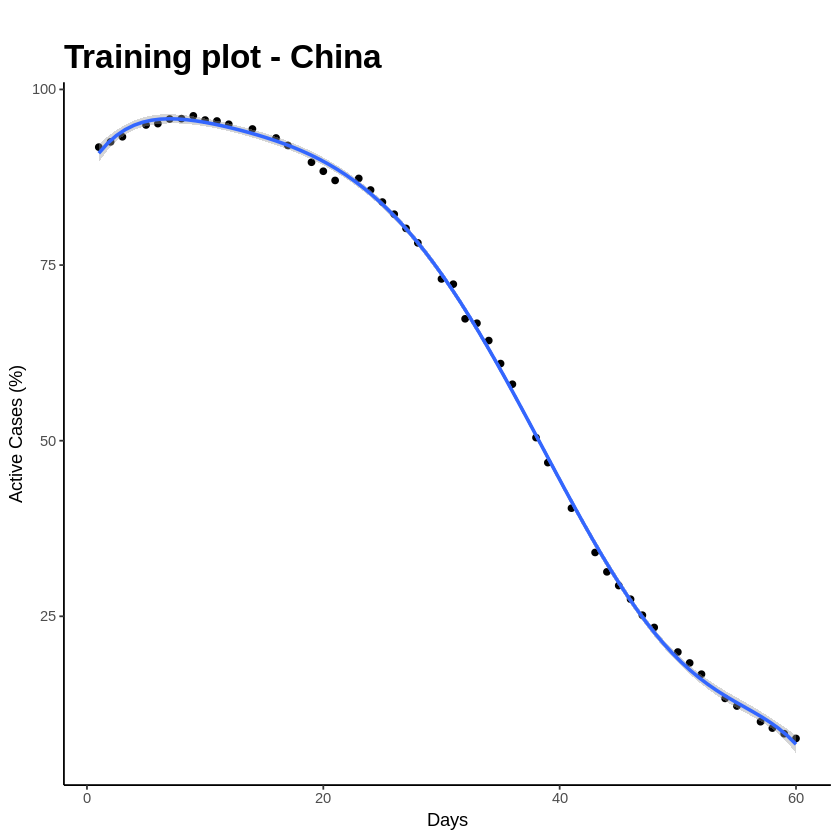

In [53]:
trainer <- ggplot(train.data, aes(Day, percent_active) ) +
              geom_point() +
              stat_smooth(method = lm, formula = y ~ poly(x, deg, raw = TRUE)) +   # polynomial function
  
              # decoration
              labs( x = "Days", y = "Active Cases (%)", title = paste("\nTraining plot", rName, sep = " - ") ) +
              theme( plot.title = element_text(size = 20, face = "bold")) 
trainer

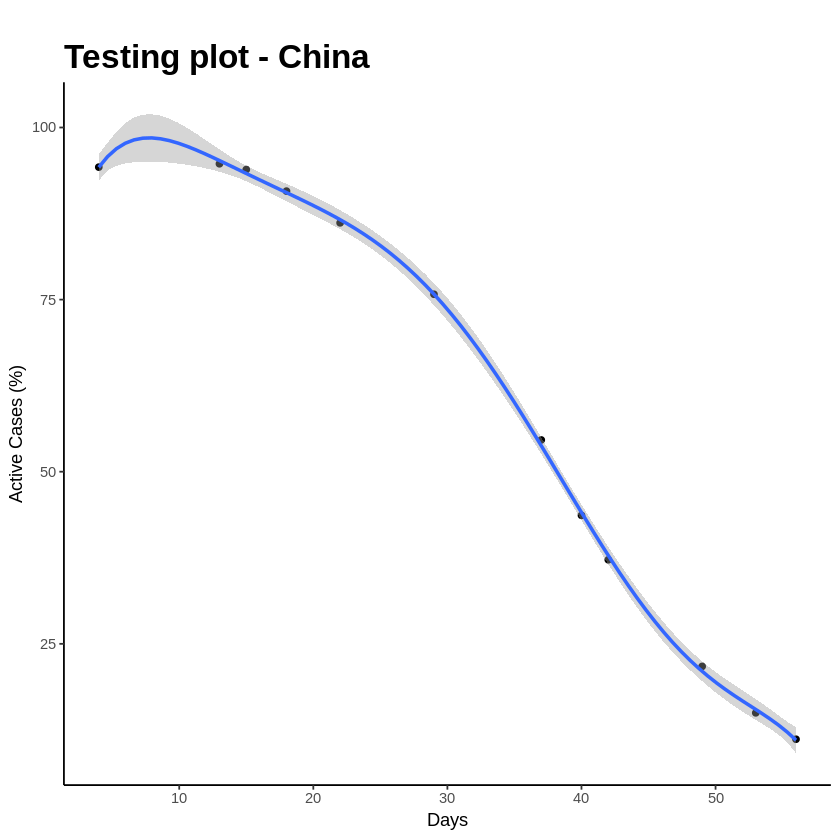

In [54]:
tester <- ggplot(test.data, aes(Day, percent_active) ) +
              geom_point() +
              stat_smooth(method = lm, formula = y ~ poly(x, deg, raw = TRUE)) +   # polynomial function
  
              # decoration
              labs( x = "Days", y = "Active Cases (%)", title = paste("\nTesting plot", rName, sep = " - ") ) +
              theme( plot.title = element_text(size = 20, face = "bold")) 
tester

<br /><br />

In [55]:
trained = cbind( # Prediction for training data
            train.data[,c("Day", "percent_active")],
            Pridicted_percent_active = predict(fit.plm, train.data)
          )

tested = cbind(  # Prediction for tested data
            test.data[,c("Day", "percent_active")],
            Pridicted_percent_active = predict(fit.plm, test.data)
         )


tail(trained, 5)
tail(tested, 5)

,Day,percent_active,Pridicted_percent_active
55,55,12.224649,12.696613
57,57,9.995931,10.773806
58,58,9.084860,9.691201
59,59,8.285436,8.401722
60,60,7.613214,6.788978


,Day,percent_active,Pridicted_percent_active
40,40,43.65961,44.45919
42,42,37.20861,38.29857
49,49,21.71795,20.73165
53,53,14.97215,14.77154
56,56,11.14017,11.74817


<br /> 
### 3. SVMK Regression

In [56]:
# model
fit.svmk <- ksvm(percent_active~Day, train.data, kernel="rbfdot")
#summary(fit.svmk)

In [57]:
predictions <- fit.svmk %>% predict(train.data)

In [58]:
# Model performance
data.frame(
  RMSE = RMSE(predictions, train.data$Day),
  R2 = R2(predictions, train.data$Day)
)

RMSE,R2
56.07186,0.9252866


<br />

In [59]:
trained = cbind( # Prediction for training data
            train.data[,c("Day", "percent_active")],
            Pridicted_percent_active = predict(fit.svmk, train.data)
          )

tested = cbind(  # Prediction for tested data
            test.data[,c("Day", "percent_active")],
            Pridicted_percent_active = predict(fit.svmk, test.data)
         )


tail(trained, 5)
tail(tested, 5)

,Day,percent_active,Pridicted_percent_active
55,55,12.224649,14.76559
57,57,9.995931,11.56442
58,58,9.084860,10.91165
59,59,8.285436,11.53136
60,60,7.613214,13.78489


,Day,percent_active,Pridicted_percent_active
40,40,43.65961,46.82524
42,42,37.20861,40.22477
49,49,21.71795,24.86076
53,53,14.97215,18.25437
56,56,11.14017,13.00035


<br />

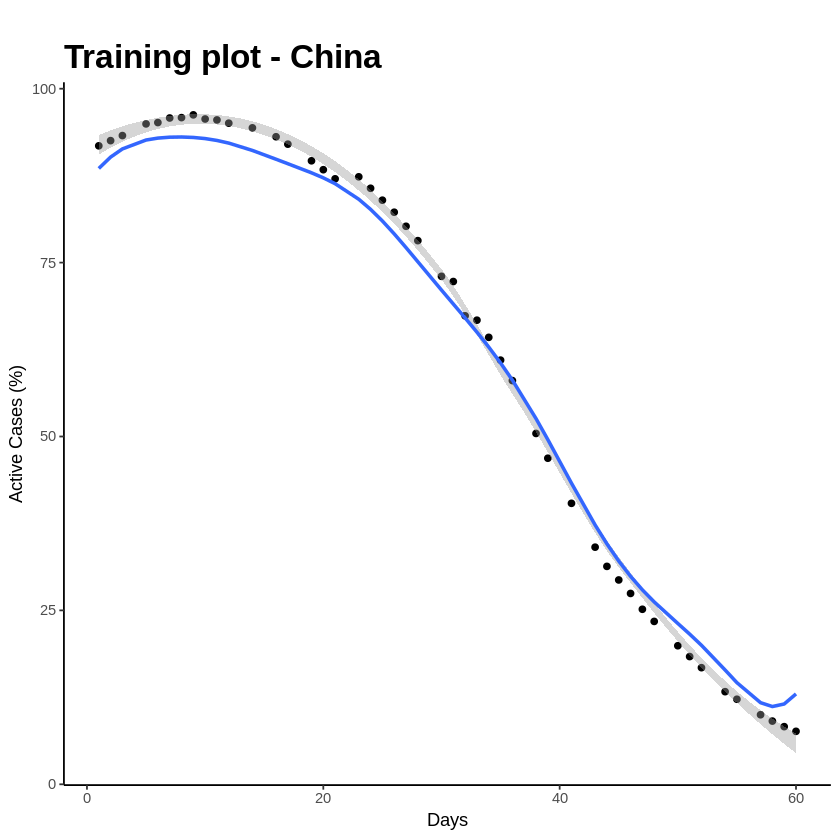

In [39]:
trainer <- ggplot(train.data, aes(Day, percent_active) ) +
              geom_point() +
              geom_smooth(data=trained, method="loess", size=0) +
              geom_line(data = trained, aes(Day, Pridicted_percent_active), color="#3366fe", size=1) +   # polynomial function
  
              # decoration
              labs( x = "Days", y = "Active Cases (%)", title = paste("\nTraining plot", rName, sep = " - ") ) +
              theme( plot.title = element_text(size = 20, face = "bold")) 
trainer

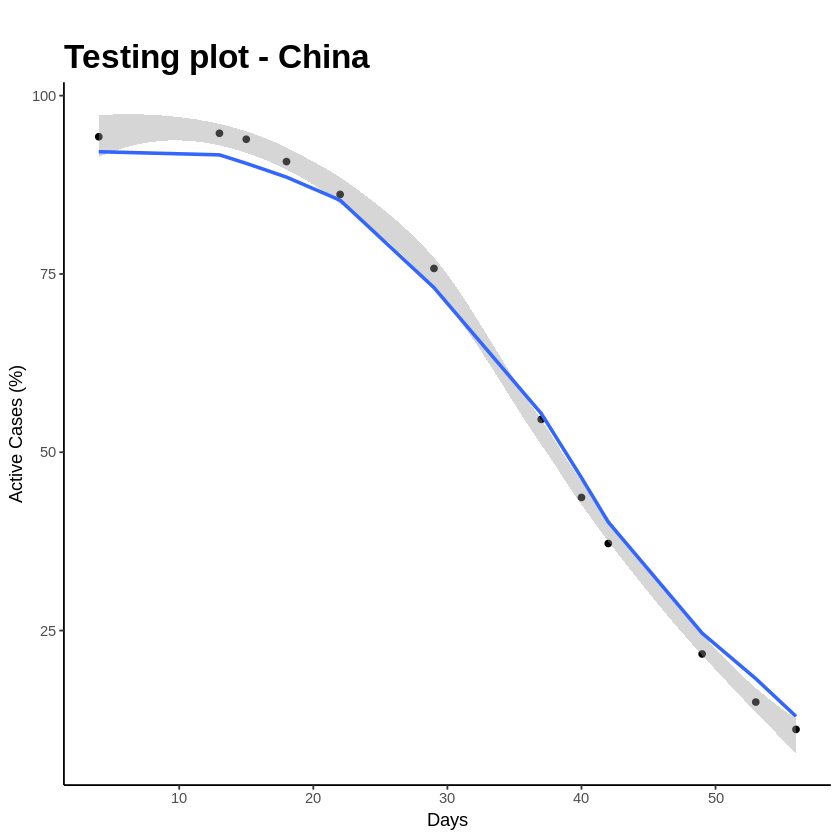

In [40]:
tester <- ggplot(test.data, aes(Day, percent_active) ) +
              geom_point() +
              geom_smooth(data=tested, method="loess", size=0) +
              geom_line(data = tested, aes(Day, Pridicted_percent_active), color="#3366fe", size=1) +   # polynomial function
  
              # decoration
              labs( x = "Days", y = "Active Cases (%)", title = paste("\nTesting plot", rName, sep = " - ") ) +
              theme( plot.title = element_text(size = 20, face = "bold")) 
tester

<br /> 
### 4. KNN Regression

In [41]:
x <- as.matrix(train.data[,1])
y <- as.matrix(train.data[,7])

In [42]:
# fit model
fit.knn <- knnreg(x, y, k=2)
#summary(fit.knn)

In [43]:
predictions <- fit.knn %>% predict(x)

In [44]:
data.frame(
  RMSE = RMSE(predictions, x),
  R2 = R2(predictions, x)
)

RMSE,R2
58.42506,0.9220401


<br />

In [45]:
trained = cbind( # Prediction for training data
            train.data[,c("Day", "percent_active")],
            Pridicted_percent_active = predict(fit.knn, as.matrix(train.data[,1]))
          )

tested = cbind(  # Prediction for tested data
            test.data[,c("Day", "percent_active")],
            Pridicted_percent_active = predict(fit.knn, as.matrix(test.data[,1]))
         )


tail(trained, 5)
tail(tested, 5)

,Day,percent_active,Pridicted_percent_active
55,55,12.224649,12.768251
57,57,9.995931,9.540396
58,58,9.084860,9.122076
59,59,8.285436,8.327837
60,60,7.613214,7.949325


,Day,percent_active,Pridicted_percent_active
40,40,43.65961,43.63372
42,42,37.20861,37.23968
49,49,21.71795,21.66513
53,53,14.97215,15.03754
56,56,11.14017,11.11029


<br />

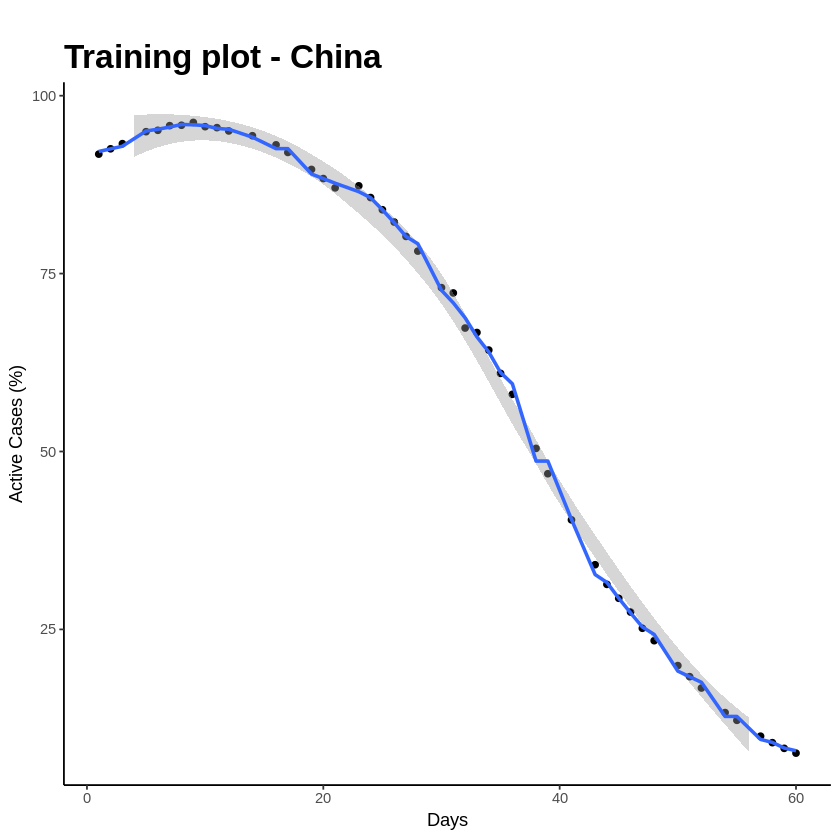

In [46]:
trainer <- ggplot(train.data, aes(Day, percent_active) ) +
              geom_point() +
              geom_smooth(data=tested, method="loess", size=0) +
              geom_line(data = trained, aes(Day, Pridicted_percent_active), color="#3366fe", size=1) +   # polynomial function
  
              # decoration
              labs( x = "Days", y = "Active Cases (%)", title = paste("\nTraining plot", rName, sep = " - ") ) +
              theme( plot.title = element_text(size = 20, face = "bold")) 
trainer

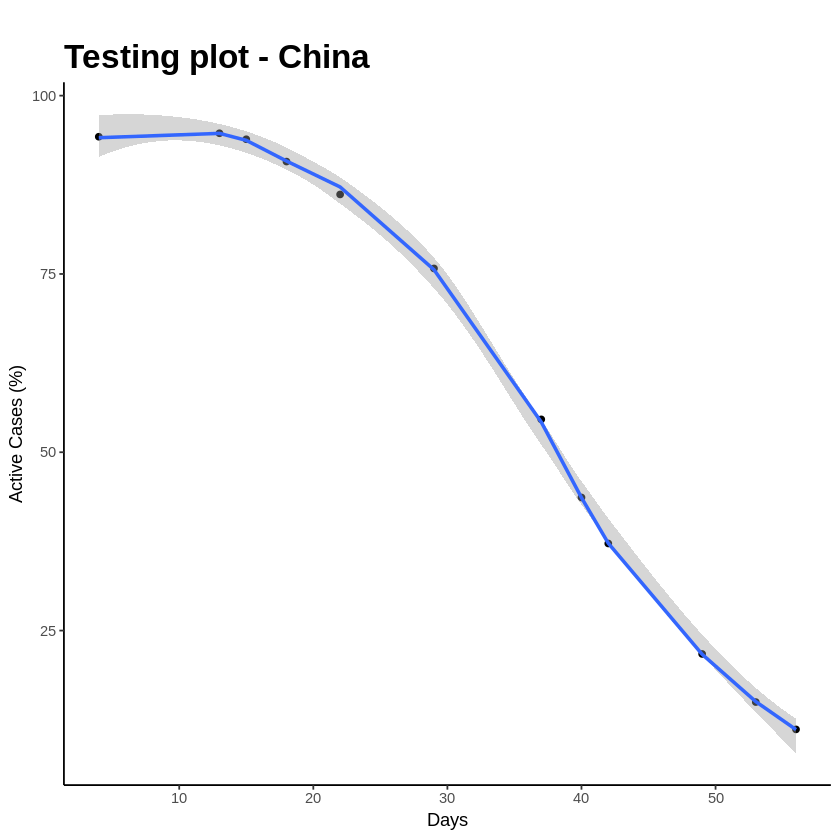

In [47]:
tester <- ggplot(test.data, aes(Day, percent_active) ) +
              geom_point() +
              geom_smooth(data=tested, method="loess", size=0) +
              geom_line(data = tested, aes(Day, Pridicted_percent_active), color="#3366fe", size=1) +   # polynomial function
  
              # decoration
              labs( x = "Days", y = "Active Cases (%)", title = paste("\nTesting plot", rName, sep = " - ") ) +
              theme( plot.title = element_text(size = 20, face = "bold")) 
tester

<br />

<br /><hr /><br />

## Predictions

In [60]:
test_Miscellaneous = data.frame(
                        Day = rep(NaN, 13),
                        #Confirmed = NaN,
                        #Active.Cases = NaN,
                        percent_active = 8.2854
                        #percent_closed = NaN
                     )

In [61]:
# 13th March ---> day 52
dNo = c(55:67)    # get the day no. to pridict

test_Miscellaneous$'Day' = dNo

<br /> 
1. #### By Linear Model

In [62]:
# modeling variable  --->  fit
Prediction = cbind(
                "Day" = 55:67,
                "Active (%)" = c(region[55:60,"percent_active"],rep(NaN, 7)),
                "By Poly M." = predict(fit.plm, test_Miscellaneous),
                "By Linear M." = predict(fit.lm, test_Miscellaneous),
                "By SVMK M." = predict(fit.svmk, test_Miscellaneous)
             )
Prediction

#train.data

Day,Active (%),By Poly M.,By Linear M.,
55,12.224649,12.696613,58.39008,14.76559
56,11.140171,11.748174,58.39008,13.00035
57,9.995931,10.773806,58.39008,11.56442
58,9.084860,9.691201,58.39008,10.91165
59,8.285436,8.401722,58.39008,11.53136
60,7.613214,6.788978,58.39008,13.78489
61,NaN,4.717340,58.39008,17.76008
62,NaN,2.030406,58.39008,23.20808
63,NaN,-1.450578,58.39008,29.59250
64,NaN,-5.928360,58.39008,36.23047


<br /> 
2. #### By Polynomial Model

In [166]:
#test_Miscellaneous

# modeling variable  --->  model
Prediction = cbind(
                test_Miscellaneous[,c("Day", "percent_active")],
                percent_pridicted = predict(model, test_Miscellaneous)
             )
Prediction

Day,percent_active,percent_pridicted
55,8.2854,12.937542
56,8.2854,11.909628
57,8.2854,10.733620
58,8.2854,9.276148
59,8.2854,7.375878
60,8.2854,4.840489
61,8.2854,1.443479
62,8.2854,-3.079210
63,8.2854,-9.032754
64,8.2854,-16.767188


In [176]:
# modeling variable  --->  model
Prediction = cbind(
                test_Miscellaneous[,c("Day", "percent_active")],
                percent_pridicted = predict(model, test_Miscellaneous)
             )
Prediction

Day,percent_active,percent_pridicted
55,8.2854,18.7888588
56,8.2854,17.0398468
57,8.2854,15.2908348
58,8.2854,13.5418228
59,8.2854,11.7928108
60,8.2854,10.0437988
61,8.2854,8.2947868
62,8.2854,6.5457748
63,8.2854,4.7967629
64,8.2854,3.0477509


<br /> 
3. #### By SVMK Model

In [165]:
# modeling variable  --->  model
Prediction = cbind(
                test_Miscellaneous[,c("Day", "percent_active")],
                percent_pridicted = predict(fit.svmk, test_Miscellaneous)
             )
Prediction

Day,percent_active,percent_pridicted
55,8.2854,14.02031
56,8.2854,12.65350
57,8.2854,11.97517
58,8.2854,12.23955
59,8.2854,13.62037
60,8.2854,16.16892
61,8.2854,19.79600
62,8.2854,24.28280
63,8.2854,29.31734
64,8.2854,34.54685


<br /> 
3. #### By KNN Model

In [167]:
# modeling variable  --->  model
Prediction = cbind(
                test_Miscellaneous[,c("Day", "percent_active")],
                percent_pridicted = predict(fit.knn, as.matrix(test_Miscellaneous[,1]))
             )
Prediction[]

Day,percent_active,percent_pridicted
55,8.2854,12.226012
56,8.2854,10.568051
57,8.2854,10.073654
58,8.2854,9.122076
59,8.2854,8.685148
60,8.2854,8.685148
61,8.2854,8.685148
62,8.2854,8.685148
63,8.2854,8.685148
64,8.2854,8.685148


<hr /> <br />

In [45]:
# world on day 58
# 92.63192 ---> @deg = 16
# 88.90763 ---> @deg = 19